# Happiness Report Model

## Import libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.pipeline import Pipeline
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # disable warnings

In [2]:
report = pd.read_csv(r"C:\Users\Abdo\Desktop\Projects\Regretion_Project\report_2018-2019.csv")

In [3]:
df = report.copy()
df.head()

Overall rank Country or region  Year  Score  GDP per capita  \
0           154       Afghanistan  2019  3.203           0.350   
1           145       Afghanistan  2018  3.632           0.332   
2           107           Albania  2019  4.719           0.947   
3           112           Albania  2018  4.586           0.916   
4            88           Algeria  2019  5.211           1.002   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.517                    0.361                         0.000   
1           0.537                    0.255                         0.085   
2           0.848                    0.874                         0.383   
3           0.817                    0.790                         0.419   
4           1.160                    0.785                         0.086   

   Generosity  Perceptions of corruption  
0       0.158                      0.025  
1       0.191                      0.036  
2       0.178                      0.027  
3       0.149                      0.032  
4       0.073                      0.114

## EDA

In [4]:
df.head()

Overall rank Country or region  Year  Score  GDP per capita  \
0           154       Afghanistan  2019  3.203           0.350   
1           145       Afghanistan  2018  3.632           0.332   
2           107           Albania  2019  4.719           0.947   
3           112           Albania  2018  4.586           0.916   
4            88           Algeria  2019  5.211           1.002   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.517                    0.361                         0.000   
1           0.537                    0.255                         0.085   
2           0.848                    0.874                         0.383   
3           0.817                    0.790                         0.419   
4           1.160                    0.785                         0.086   

   Generosity  Perceptions of corruption  
0       0.158                      0.025  
1       0.191                      0.036  
2       0.178                      0.027  
3       0.149                      0.032  
4       0.073                      0.114

In [5]:
df.shape

(312, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Year                          312 non-null    int64  
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       312 non-null    float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [7]:
df['Country or region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait'

In [8]:
df['Country or region'].nunique()

160

In [9]:
df['Country or region'].value_counts()

Country or region
Afghanistan    2
Pakistan       2
Netherlands    2
New Zealand    2
Nicaragua      2
              ..
Macedonia      1
Sudan          1
Angola         1
Swaziland      1
Comoros        1
Name: count, Length: 160, dtype: int64

In [10]:
df.describe().T

count         mean        std       min  \
Overall rank                  312.0    78.500000  45.104737     1.000   
Year                          312.0  2018.500000   0.500803  2018.000   
Score                         312.0     5.391506   1.114631     2.853   
GDP per capita                312.0     0.898298   0.394592     0.000   
Social support                312.0     1.211026   0.300310     0.000   
Healthy life expectancy       312.0     0.661295   0.252724     0.000   
Freedom to make life choices  312.0     0.423538   0.156024     0.000   
Generosity                    312.0     0.182926   0.096739     0.000   
Perceptions of corruption     312.0     0.111526   0.095296     0.000   

                                     25%        50%         75%       max  
Overall rank                    39.75000    78.5000   117.25000   156.000  
Year                          2018.00000  2018.5000  2019.00000  2019.000  
Score                            4.51425     5.3795     6.17600     7.769  
GDP per capita                   0.60950     0.9600     1.21950     2.096  
Social support                   1.05575     1.2655     1.45750     1.644  
Healthy life expectancy          0.48825     0.6990     0.85800     1.141  
Freedom to make life choices     0.32250     0.4495     0.54025     0.724  
Generosity                       0.10875     0.1755     0.24500     0.598  
Perceptions of corruption        0.05000     0.0820     0.14125     0.457

# Insights from Summary Statistics

The dataset provides valuable insights into various metrics related to happiness and associated factors:

1. **Overall Rank**:
   - Countries are ranked between 1 and 156, with a mean rank of 78.5.
   - The spread of rankings is fairly wide, as indicated by a standard deviation of 45.1.

2. **Year**:
   - Data spans two years: 2018 and 2019, with an equal distribution (mean: 2018.5).

3. **Happiness Score**:
   - Scores range from a low of 2.85 to a high of 7.77, with an average score of 5.39.
   - The interquartile range (IQR) suggests most countries fall between 4.51 and 6.18.

4. **GDP per Capita**:
   - Values range from 0 to 2.10, with a mean of 0.90.
   - A relatively high IQR (0.61 to 1.22) reflects economic disparities among countries.

5. **Social Support**:
   - Scores vary from 0 to 1.64, with an average of 1.21.
   - Most countries fall between 1.06 and 1.46, indicating overall strong social support systems.

6. **Healthy Life Expectancy**:
   - Scores range from 0 to 1.14, with an average of 0.66.
   - The IQR (0.49 to 0.86) highlights variations in health outcomes globally.

7. **Freedom to Make Life Choices**:
   - Scores range from 0 to 0.72, with a mean of 0.42.
   - The IQR (0.32 to 0.54) suggests moderate variability in perceived freedom.

8. **Generosity**:
   - Scores range from 0 to 0.60, with an average of 0.18.
   - Most countries cluster between 0.11 and 0.25, indicating lower levels of generosity overall.

9. **Perceptions of Corruption**:
   - Scores vary from 0 to 0.46, with a mean of 0.11.
   - The IQR (0.05 to 0.14) shows a general perception of high corruption in many countries.

### Key Observations:
- Economic factors (GDP per capita) and health outcomes (healthy life expectancy) show considerable disparities among countries.
- Social support is one of the more consistent and higher-scoring factors across the dataset.
- Freedom, generosity, and perceptions of corruption reflect varying degrees of social and governance-related challenges.


## Preprocessing

In [11]:
# Renaming columns
df.rename(
    columns={
        "Overall rank": "Rank",
        "Country or region": "Country",
        "Year": "Year",
        "Score": "Happiness_Score",
        "GDP per capita": "GDP_Per_Capita",
        "Social support": "Social_Support",
        "Healthy life expectancy": "Healthy_Life_Expectancy",
        "Freedom to make life choices": "Freedom",
        "Generosity": "Generosity",
        "Perceptions of corruption": "Corruption_Perception",
    },
    inplace=True,
)
df.sample()

Rank Country  Year  Happiness_Score  GDP_Per_Capita  Social_Support  \
127    19  Israel  2018            6.814           1.301           1.559   

     Healthy_Life_Expectancy  Freedom  Generosity  Corruption_Perception  
127                    0.883    0.533       0.354                  0.272

#### Step: Replacing Country with Latitude for Model Input

In this step, rather than performing encoding on the `Country` column, we will use the latitude of each country or region. This approach allows us to incorporate geographical information directly into the model, which can be beneficial for capturing regional patterns or trends that may influence the target variable. By using latitude, we can represent the geographical location numerically, making it suitable for inclusion in the machine learning model without the need for traditional categorical encoding methods.


In [12]:
country_latitudes = {
    "Afghanistan": 33.93911,
    "Albania": 41.1533,
    "Algeria": 28.0339,
    "Angola": -11.2027,
    "Argentina": -38.4161,
    "Armenia": 40.0691,
    "Australia": -25.2744,
    "Austria": 47.5162,
    "Azerbaijan": 40.1431,
    "Bahrain": 26.0667,
    "Bangladesh": 23.685,
    "Belarus": 53.7098,
    "Belgium": 50.5039,
    "Belize": 17.1899,
    "Benin": 9.3077,
    "Bhutan": 27.5142,
    "Bolivia": -16.2902,
    "Bosnia and Herzegovina": 43.9159,
    "Botswana": -22.3285,
    "Brazil": -14.235,
    "Bulgaria": 42.7339,
    "Burkina Faso": 12.2383,
    "Burundi": -3.3731,
    "Cambodia": 12.5657,
    "Cameroon": 7.3697,
    "Canada": 56.1304,
    "Central African Republic": 6.6111,
    "Chad": 15.4542,
    "Chile": -35.6751,
    "China": 35.8617,
    "Colombia": 4.5709,
    "Comoros": -11.6455,
    "Congo (Brazzaville)": -4.2634,
    "Congo (Kinshasa)": -4.0383,
    "Costa Rica": 9.7489,
    "Croatia": 45.1,
    "Cyprus": 35.1264,
    "Czech Republic": 49.8175,
    "Denmark": 56.2639,
    "Dominican Republic": 18.7357,
    "Ecuador": -1.8312,
    "Egypt": 26.8206,
    "El Salvador": 13.7942,
    "Estonia": 58.5953,
    "Ethiopia": 9.145,
    "Finland": 61.9241,
    "France": 46.6034,
    "Gabon": -0.8037,
    "Gambia": 13.4432,
    "Georgia": 42.3154,
    "Germany": 51.1657,
    "Ghana": 7.9465,
    "Greece": 39.0742,
    "Guatemala": 15.7835,
    "Guinea": 9.9456,
    "Haiti": 18.9712,
    "Honduras": 15.2,
    "Hong Kong": 22.3193,
    "Hungary": 47.1625,
    "Iceland": 64.9631,
    "India": 20.5937,
    "Indonesia": -0.7893,
    "Iran": 32.4279,
    "Iraq": 33.2232,
    "Ireland": 53.1424,
    "Israel": 31.0461,
    "Italy": 41.8719,
    "Ivory Coast": 7.54,
    "Jamaica": 18.1096,
    "Japan": 36.2048,
    "Jordan": 30.5852,
    "Kazakhstan": 48.0196,
    "Kenya": -0.0236,
    "Kosovo": 42.6026,
    "Kuwait": 29.3759,
    "Kyrgyzstan": 41.2044,
    "Laos": 19.8563,
    "Latvia": 56.8796,
    "Lebanon": 33.8547,
    "Lesotho": -29.61,
    "Liberia": 6.4281,
    "Libya": 26.3351,
    "Lithuania": 55.1694,
    "Luxembourg": 49.8153,
    "Macedonia": 41.6086,
    "Madagascar": -18.7669,
    "Malawi": -13.2543,
    "Malaysia": 4.2105,
    "Mali": 17.5707,
    "Malta": 35.9375,
    "Mauritania": 21.0079,
    "Mauritius": -20.3484,
    "Mexico": 23.6345,
    "Moldova": 47.4116,
    "Mongolia": 46.8625,
    "Montenegro": 42.7087,
    "Morocco": 31.7917,
    "Mozambique": -18.6657,
    "Myanmar": 21.9162,
    "Namibia": -22.9576,
    "Nepal": 28.3949,
    "Netherlands": 52.1326,
    "New Zealand": -40.9006,
    "Nicaragua": 12.8654,
    "Niger": 17.6078,
    "Nigeria": 9.082,
    "North Macedonia": 41.6086,
    "Northern Cyprus": 35.1264,
    "Norway": 60.472,
    "Pakistan": 30.3753,
    "Palestinian Territories": 31.9522,
    "Panama": 8.5379,
    "Paraguay": -23.4425,
    "Peru": -9.19,
    "Philippines": 12.8797,
    "Poland": 51.9194,
    "Portugal": 39.3999,
    "Qatar": 25.3548,
    "Romania": 45.9432,
    "Russia": 61.524,
    "Rwanda": -1.9403,
    "Saudi Arabia": 23.8859,
    "Senegal": 14.4974,
    "Serbia": 44.0165,
    "Sierra Leone": 8.4606,
    "Singapore": 1.3521,
    "Slovakia": 48.669,
    "Slovenia": 46.1512,
    "Somalia": 5.1521,
    "South Africa": -30.5595,
    "South Korea": 35.9078,
    "South Sudan": 6.8769,
    "Spain": 40.4637,
    "Sri Lanka": 7.8731,
    "Sudan": 12.8628,
    "Swaziland": -26.5225,
    "Sweden": 60.1282,
    "Switzerland": 46.8182,
    "Syria": 34.8021,
    "Taiwan": 23.6978,
    "Tajikistan": 38.861,
    "Tanzania": -6.369,
    "Thailand": 15.87,
    "Togo": 8.6195,
    "Trinidad & Tobago": 10.6918,
    "Tunisia": 33.8869,
    "Turkey": 38.9637,
    "Turkmenistan": 38.9697,
    "Uganda": 1.3733,
    "Ukraine": 48.3794,
    "United Arab Emirates": 23.4241,
    "United Kingdom": 55.3781,
    "United States": 37.0902,
    "Uruguay": -32.5228,
    "Uzbekistan": 41.3775,
    "Venezuela": 6.4238,
    "Vietnam": 14.0583,
    "Yemen": 15.5527,
    "Zambia": -13.1339,
    "Zimbabwe": -19.0154
}

import pandas as pd
df['Latitude'] = df['Country'].map(country_latitudes)  # map here take each row and apply the methd on it   # 1

df.head()

Rank      Country  Year  Happiness_Score  GDP_Per_Capita  Social_Support  \
0   154  Afghanistan  2019            3.203           0.350           0.517   
1   145  Afghanistan  2018            3.632           0.332           0.537   
2   107      Albania  2019            4.719           0.947           0.848   
3   112      Albania  2018            4.586           0.916           0.817   
4    88      Algeria  2019            5.211           1.002           1.160   

   Healthy_Life_Expectancy  Freedom  Generosity  Corruption_Perception  \
0                    0.361    0.000       0.158                  0.025   
1                    0.255    0.085       0.191                  0.036   
2                    0.874    0.383       0.178                  0.027   
3                    0.790    0.419       0.149                  0.032   
4                    0.785    0.086       0.073                  0.114   

   Latitude  
0  33.93911  
1  33.93911  
2  41.15330  
3  41.15330  
4  28.03390

In [13]:
df.drop(columns='Country', inplace=True)
df.sample()

Rank  Year  Happiness_Score  GDP_Per_Capita  Social_Support  \
100    82  2019            5.287           1.181           1.156   

     Healthy_Life_Expectancy  Freedom  Generosity  Corruption_Perception  \
100                    0.999    0.067         0.0                  0.034   

     Latitude  
100   39.0742

In [14]:
# Check nulls and duplicates

print(df.duplicated().sum())
print(df.isnull().sum().sum())

0
0


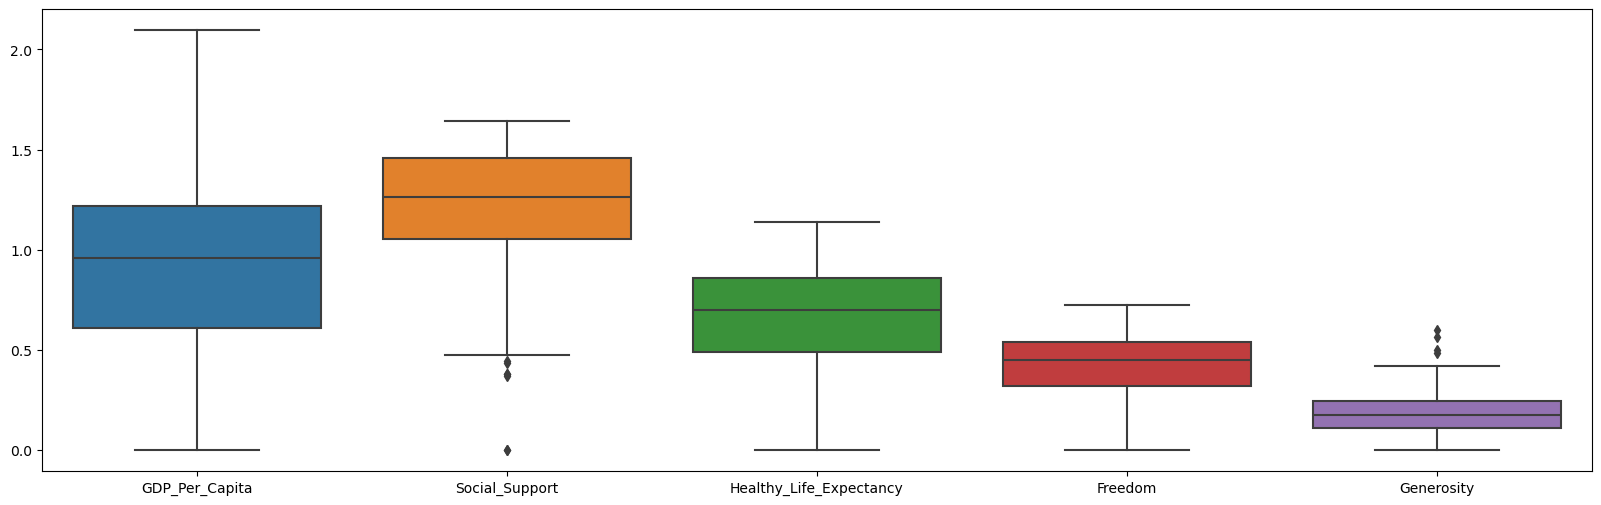

In [15]:
figure = plt.figure(figsize=(20,6))
sns.boxplot(data = df.drop(columns = ["Rank","Year","Latitude","Happiness_Score","Corruption_Perception"]))
plt.show()

In [16]:
q552, q952 = df["Generosity"].quantile([0.00, 0.95])
df_no = df[(df["Generosity"] >= q552) & (df["Generosity"] <= q952)]
df["Generosity"] = df_no["Generosity"]

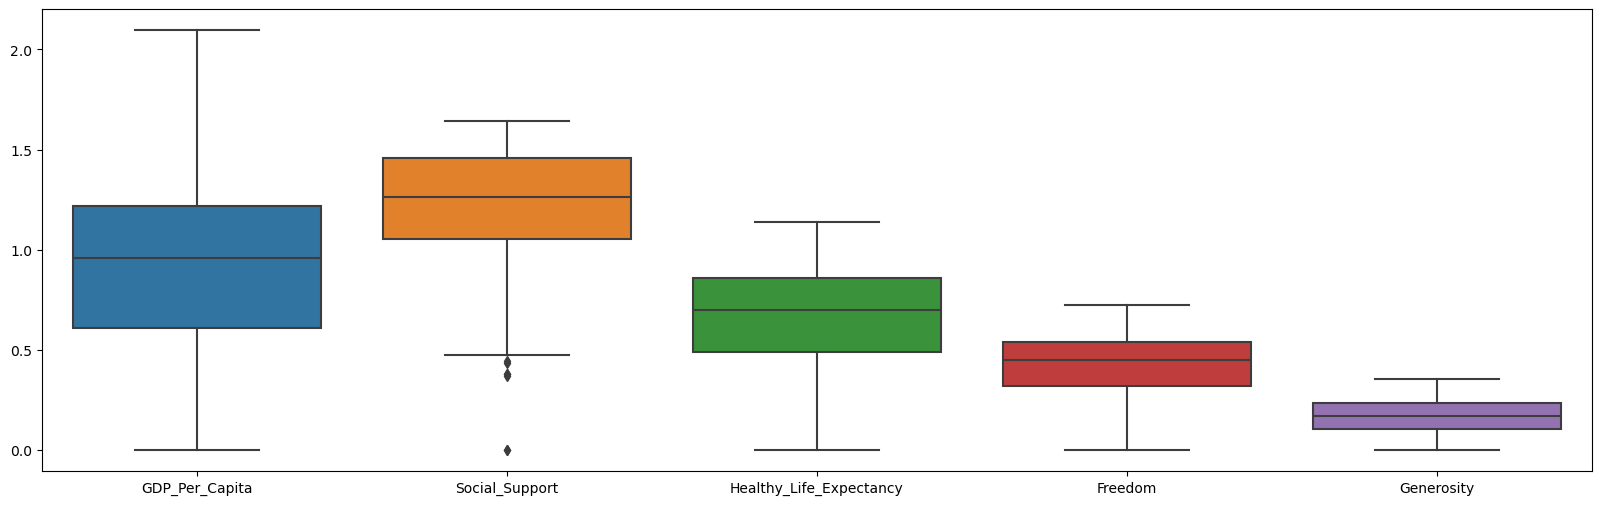

In [17]:
figure = plt.figure(figsize=(20,6))
sns.boxplot(data = df.drop(columns = ["Rank","Year","Latitude","Happiness_Score","Corruption_Perception"]))
plt.show()

## Modeling

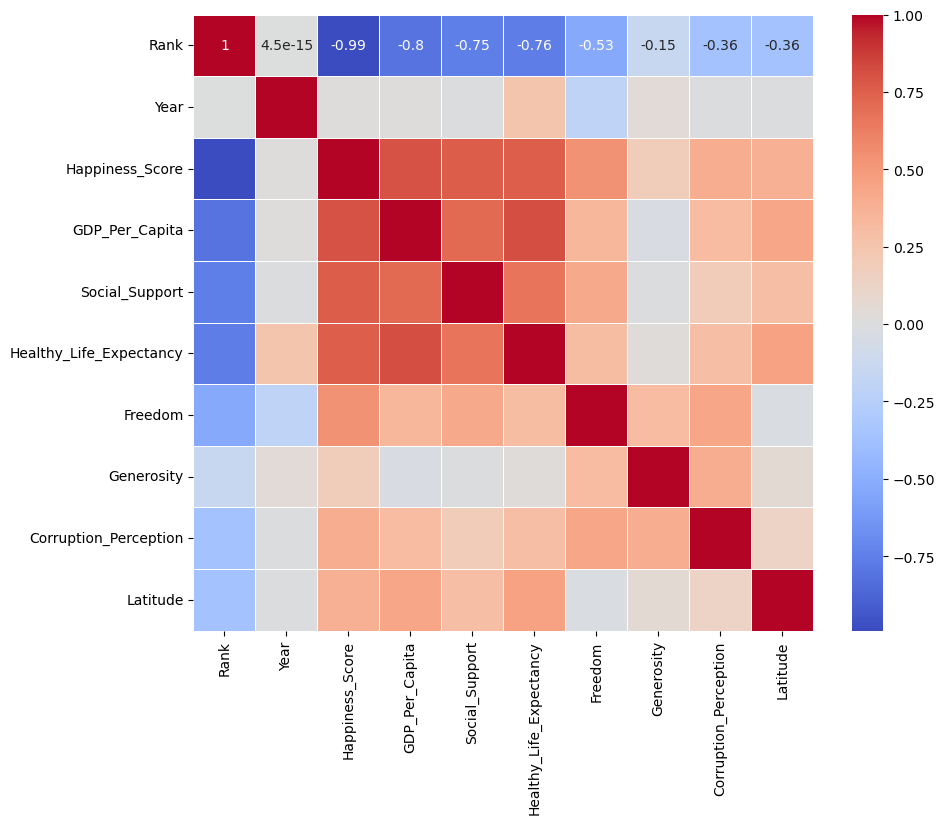

In [18]:
corr_matrix = df.corr()  # CORRELATION MATRIX

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

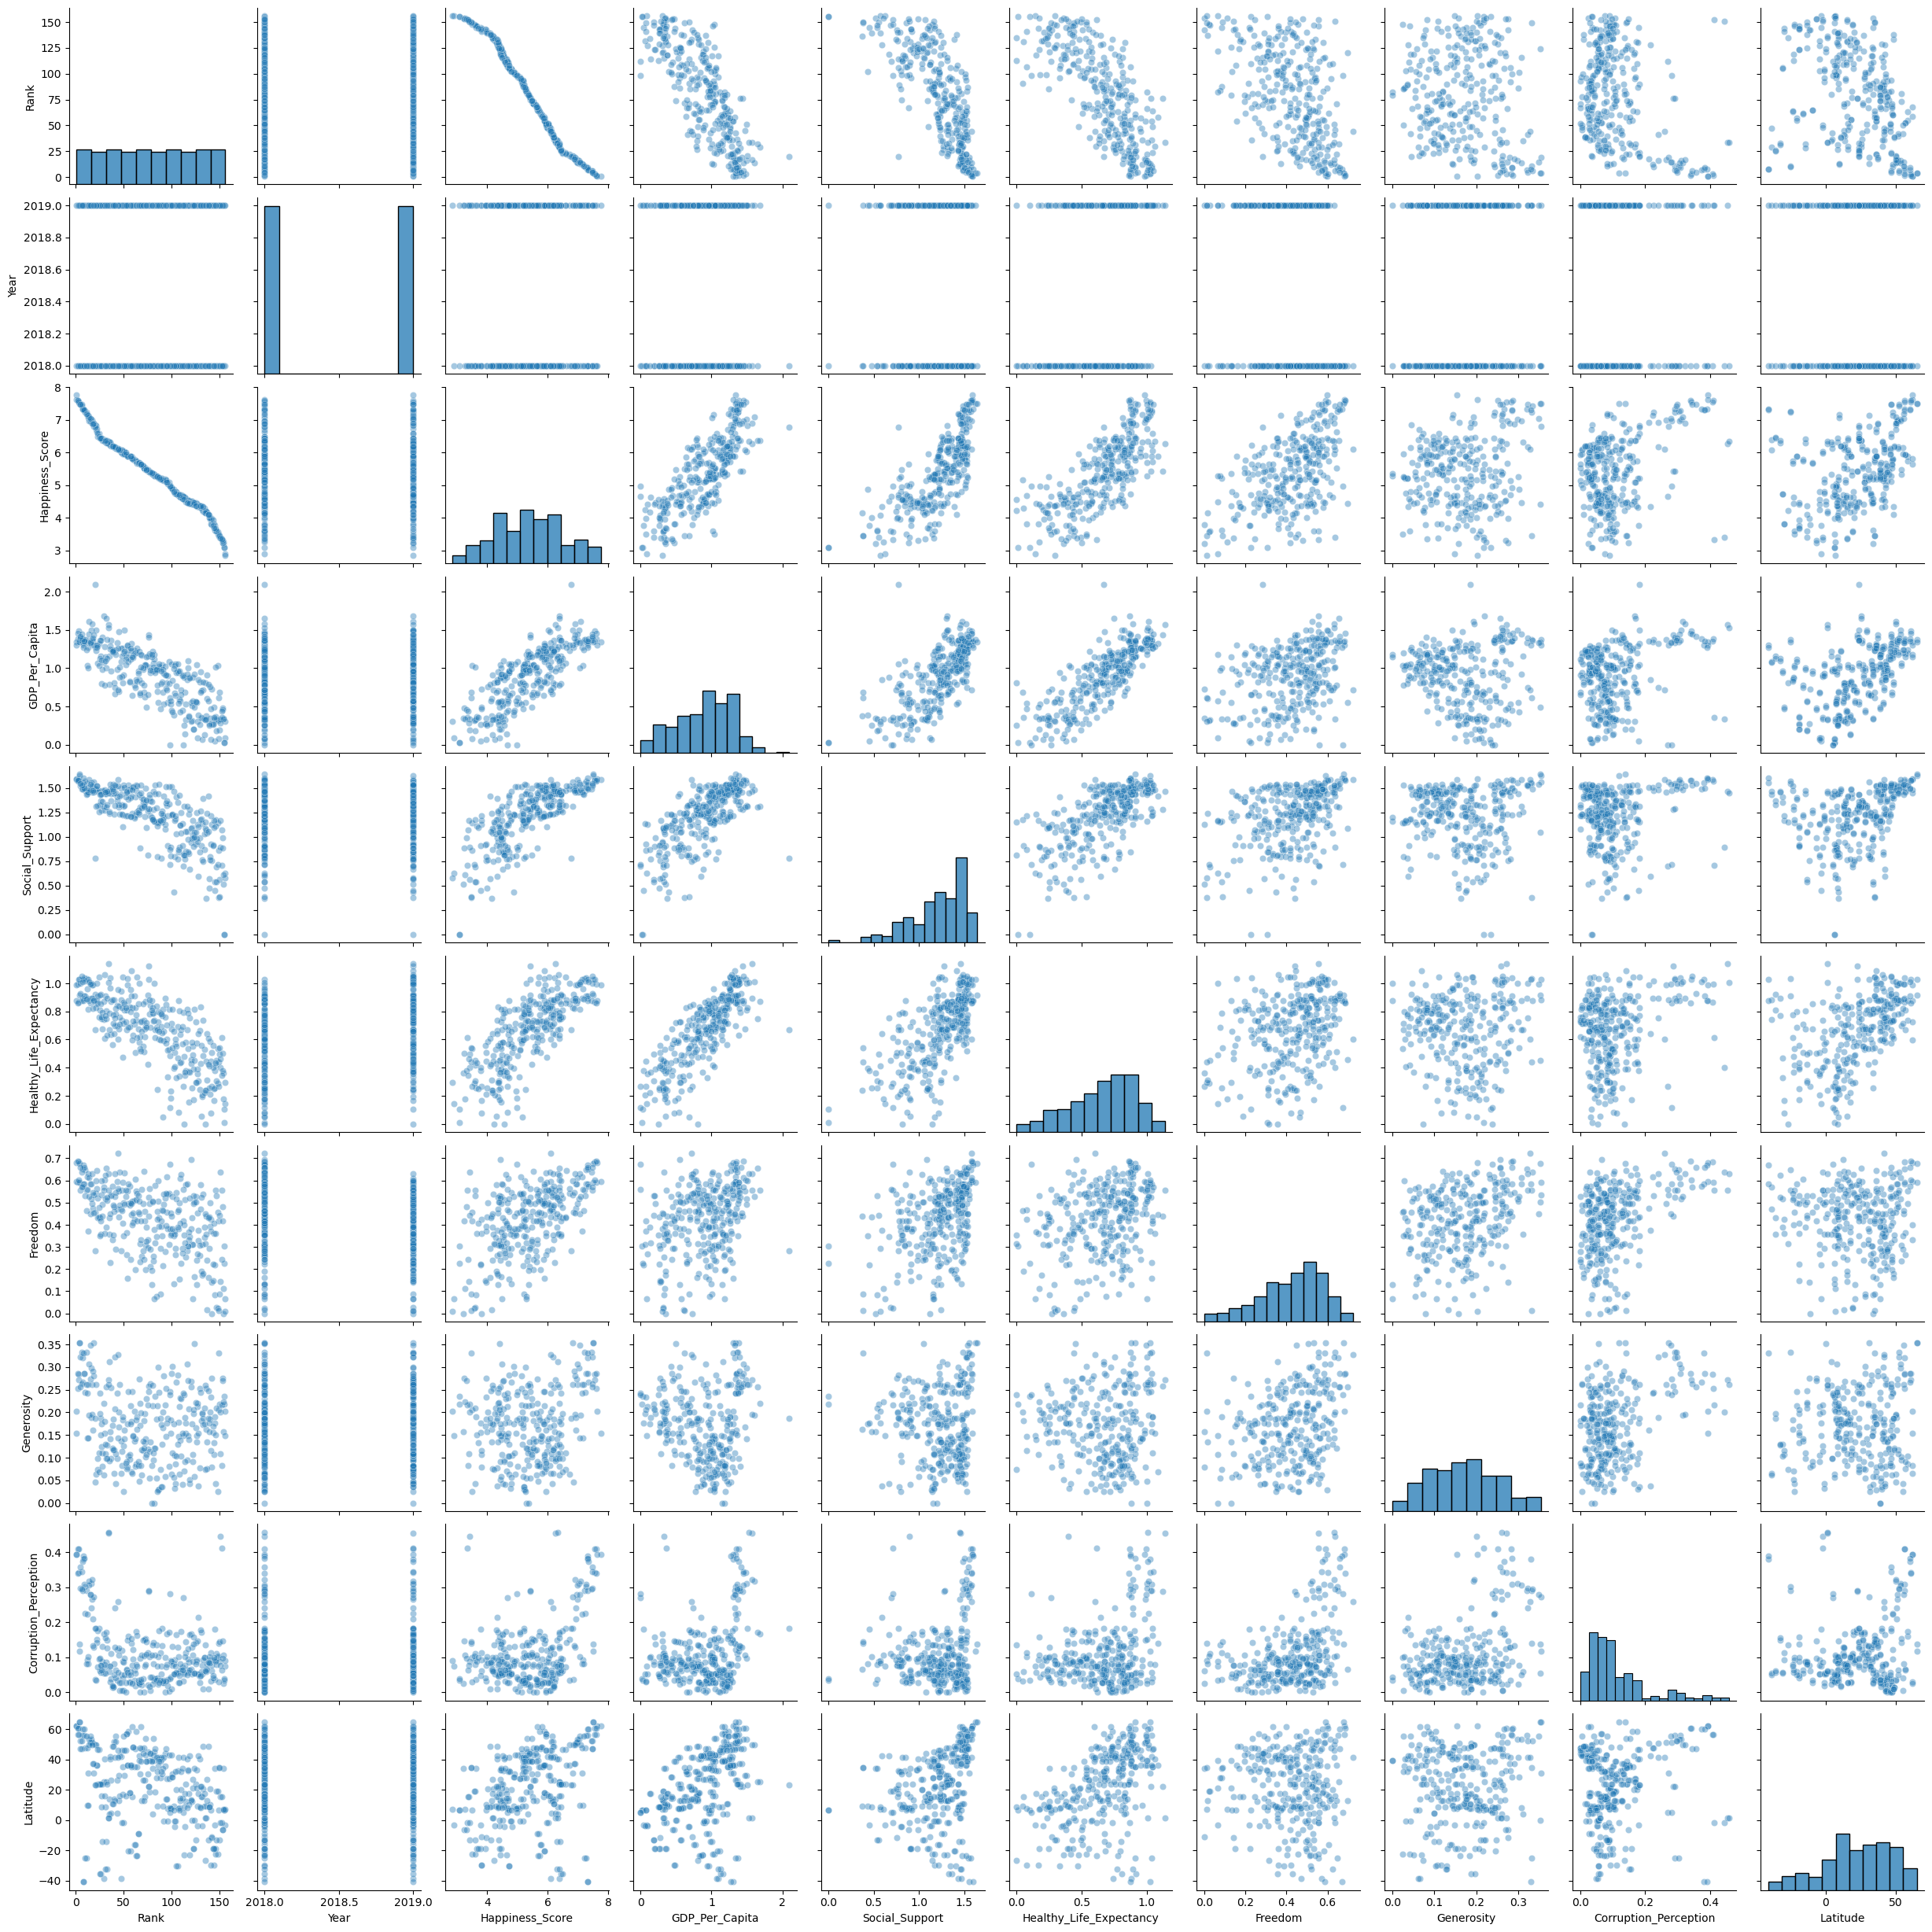

In [19]:
sns.pairplot(df,kind = "scatter" , plot_kws = {"alpha": 0.4})

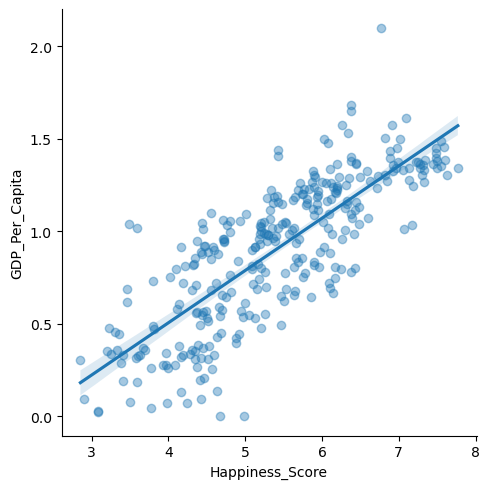

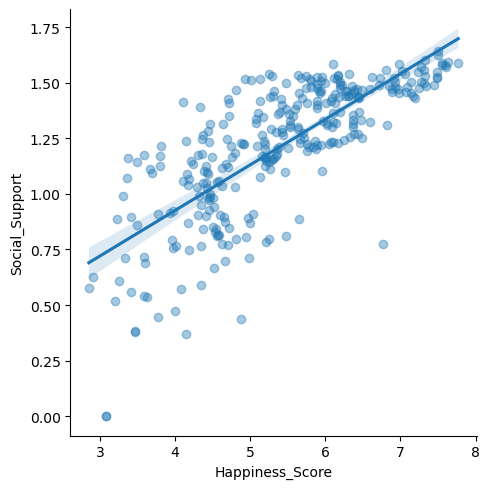

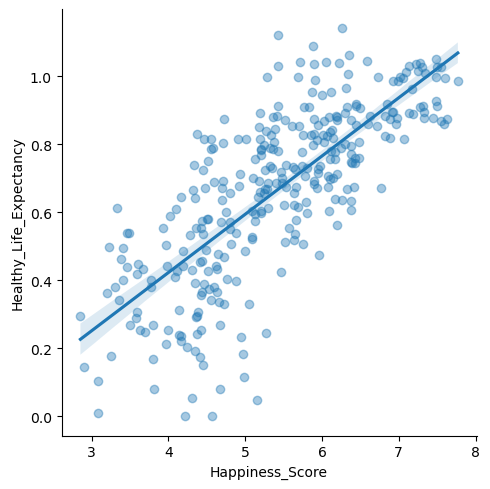

In [20]:
sns.lmplot ( x = "Happiness_Score" , y = "GDP_Per_Capita" , data = df , scatter_kws={"alpha" : 0.4} )
sns.lmplot ( x = "Happiness_Score" , y = "Social_Support" , data = df , scatter_kws={"alpha" : 0.4} )
sns.lmplot ( x = "Happiness_Score" , y = "Healthy_Life_Expectancy" , data = df , scatter_kws={"alpha" : 0.4} )

In [21]:
correlations = df.corr()
for column in df.columns:
    if column != "Happiness_Score":
        score_correlation = correlations.loc["Happiness_Score", column]
        print(f"{column}: ({score_correlation})")

Rank: (-0.9903250125882455)
Year: (0.014008934291403746)
GDP_Per_Capita: (0.7979774590297428)
Social_Support: (0.7610804996133)
Healthy_Life_Expectancy: (0.7558749404502871)
Freedom: (0.5398973339024397)
Generosity: (0.17653978250434324)
Corruption_Perception: (0.3969473314479115)
Latitude: (0.38384645070594403)


#### Feature Correlations with Happiness Score

In this analysis, we observe that three features exhibit a strong correlation with the `Happiness_Score`:

1. **GDP_Per_Capita**
2. **Social_Support**
3. **Healthy_Life_Expectancy**

### Single Linear Regression Test

In [22]:
X = df['GDP_Per_Capita']
y = df['Happiness_Score']

In [23]:
X = X.to_numpy().reshape(-1, 1)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=24)

print(len(X))
print(len(y))
print(len(X_test))
print(len(y_train))

312
312
94
218


In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.score(X_train,y_train)

0.6105782609593127

In [28]:
lr.score(X_test,y_test)

0.6684196643725747

In [29]:
pred = lr.predict(X_test)
pred

array([6.15943812, 6.42883924, 5.15666726, 6.07177585, 3.49536031,
       5.55435464, 4.3612925 , 6.19364779, 4.60076017, 3.591575  ,
       4.58793155, 4.09830569, 6.48015375, 6.36255802, 5.67408847,
       4.81670869, 5.96914685, 6.44808218, 6.10384741, 4.88298992,
       5.65484553, 4.7696704 , 6.31551972, 5.92852287, 5.16949588,
       5.40254924, 6.39462958, 5.54366412, 5.27212488, 6.05039481,
       4.67131761, 6.05467101, 5.46455426, 4.23514436, 6.44380597,
       5.14597674, 5.57359757, 5.49662582, 3.60654173, 6.20861451,
       4.45323098, 4.2565254 , 4.64566036, 6.00977083, 6.64906398,
       5.78099368, 5.73181728, 4.05768171, 3.99140048, 5.92210855,
       6.21075262, 6.02259945, 6.62554483, 6.88425543, 6.21075262,
       6.31124352, 5.90072751, 6.54857308, 4.38908786, 4.8722994 ,
       6.65761639, 6.08032826, 5.3298537 , 5.13956243, 4.17955365,
       4.41688321, 5.66553605, 5.70829814, 5.9477658 , 3.73910419,
       5.39613493, 6.5571255 , 6.13378087, 5.22081038, 4.93216

In [30]:
# feature X1
print ("MEAN ABSOLUTE ERROR :" , mean_absolute_error(y_test , pred)) # Absolute between predicted and the original one
print ("MEAN Squared ERROR  :" , mean_squared_error(y_test , pred))  # SQUARED between predicted adn the original one
print ("SQRT MSE : " , np.sqrt(mean_squared_error(y_test , pred))) #RMSE 
r2 = r2_score(y_test, pred)
print("R2 Score:", r2)  # Measure Agreement between predicted values and real values

MEAN ABSOLUTE ERROR : 0.5751835540564437
MEAN Squared ERROR  : 0.47083989652471875
SQRT MSE :  0.686177744119349
R2 Score: 0.6684196643725747


Text(0.5, 1.0, 'Evaluation of Predictions')

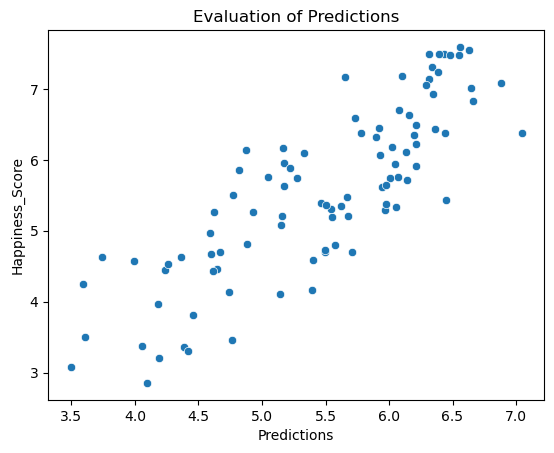

In [31]:
sns.scatterplot(x= pred , y= y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of Predictions")

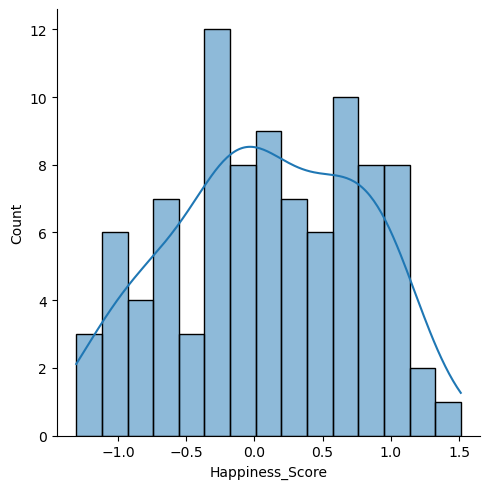

In [32]:
# testing the normality of model
residuals = y_test - pred 
sns.displot(residuals , bins = 15 , kde = True)

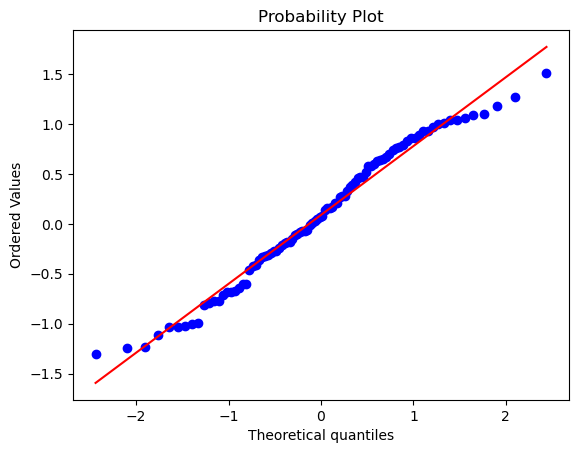

In [33]:
stats.probplot(residuals , dist = "norm" , plot = plt)
plt.show()

In [34]:
m = lr.coef_[0]  # For single feature, coef_ will have a single value
b = lr.intercept_

# Display the equation
print(f"The equation of the linear regression model is: y = {m:.2f}x + {b:.2f}")

The equation of the linear regression model is: y = 2.14x + 3.44


#### Model Evaluation Metrics

Here are the evaluation metrics for the model:

- **Mean Absolute Error (MAE)**: 0.5752  
  This indicates the average magnitude of errors in the model's predictions, without considering their direction. The lower the value, the better the model's predictions are.

- **Mean Squared Error (MSE)**: 0.4708  
  This metric squares the error before averaging, giving more weight to larger errors. A lower value signifies better model performance, with the model being less prone to large errors.

- **Root Mean Squared Error (RMSE)**: 0.6862  
  This is the square root of the MSE and provides an error metric in the same units as the target variable. Lower RMSE values indicate better fit, and this value suggests a moderately good model fit.

- **R² Score (Coefficient of Determination)**: 0.6684  
  The R² score represents the proportion of variance in the target variable that is explained by the model. A value of 0.6684 means that approximately 66.8% of the variance in the target variable is explained by the model, indicating a decent model performance.

#### The equation of the linear regression model is: `y = 2.14x + 3.44`

### Multible Linear Regression Test

#### Feature Correlations with Happiness Score

In this analysis, we observe that three features exhibit a strong correlation with the `Happiness_Score`:

1. **GDP_Per_Capita**
2. **Social_Support**
3. **Healthy_Life_Expectancy**

In [35]:
X = df[['GDP_Per_Capita','Social_Support','Healthy_Life_Expectancy']]
y = df['Happiness_Score']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
lr.score(X_train, y_train)

0.7151107279148634

In [40]:
pred = lr.predict(X_test)
pred

array([6.35877005, 6.58856717, 4.83966754, 5.90623624, 2.306453  ,
       5.62841238, 4.58065141, 6.49899544, 4.00796464, 4.03803043,
       4.13000683, 3.61368177, 6.57408057, 6.30349094, 5.53327197,
       5.33422062, 5.90584504, 6.32305229, 6.21744346, 4.46636686,
       6.10681296, 5.06549224, 6.6138439 , 5.8128717 , 4.9548383 ,
       5.00144197, 6.73492118, 5.7068266 , 5.79669357, 6.25783886,
       4.92834736, 5.79090704, 5.60349696, 4.39513012, 6.17275949,
       5.30566287, 5.80004684, 5.86006664, 3.74234985, 6.32686327,
       4.39348889, 4.09758411, 4.74851015, 6.15446262, 6.725791  ,
       5.99247457, 5.88264973, 4.53838179, 3.58296099, 6.08588081,
       6.48859672, 6.18441012, 6.78282435, 6.74455012, 6.40306419,
       6.40467998, 6.16246687, 6.69961538, 4.44436078, 5.33889487,
       6.23477894, 6.24657557, 5.48323735, 5.48798472, 3.85013027,
       4.38693035, 5.92173818, 4.97519462, 5.94997155, 3.78957364,
       5.14366681, 6.584762  , 6.41435596, 5.83252046, 4.63354

In [41]:
print ("MEAN ABSOLUTE ERROR :" , mean_absolute_error(y_test , pred)) # Absolute between predicted and the original one
print ("MEAN Squared ERROR  :" , mean_squared_error(y_test , pred))  # SQUARED between predicted adn the original one
print ("SQRT MSE : " , np.sqrt(mean_squared_error(y_test , pred))) #RMSE 
r2 = r2_score(y_test, pred)
print("R2 Score:", r2)  # Measure Agreement between predicted values and real values

MEAN ABSOLUTE ERROR : 0.5183543304294755
MEAN Squared ERROR  : 0.36983001202892335
SQRT MSE :  0.6081365077257929
R2 Score: 0.7395540173660555


In [45]:
def adjusted_r_squared(r_squared, n, p):
    return 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

# Assuming you have values for R-squared, number of observations (n), and number of predictors (p)
n = len(y_test)
p = 3  # Assuming you have one predictor # عدد الفيتشرز الي بتيست عليهم
r_squared = r2  # Your R-squared value 

r_adj = adjusted_r_squared(r2, n, p)
print("Adjusted R-squared:", r_adj)

Adjusted R-squared: 0.7308724846115907


In [59]:
print("B0 , B1 , B2",lr.coef_)
print()

B0 , B1 , B2 [0.93640755 1.31528553 1.0065707 ]



Text(0.5, 1.0, 'Evaluation of Predictions')

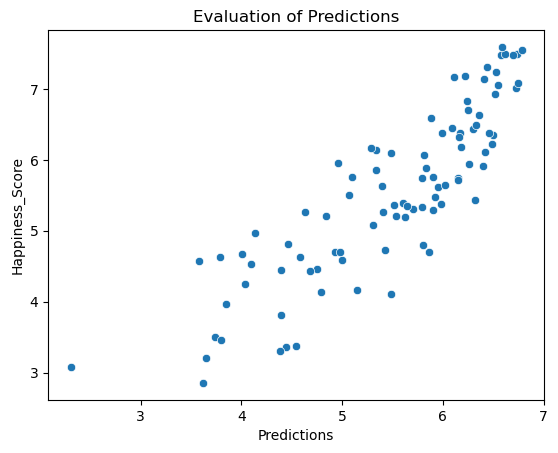

In [47]:
sns.scatterplot(x= pred , y= y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of Predictions")

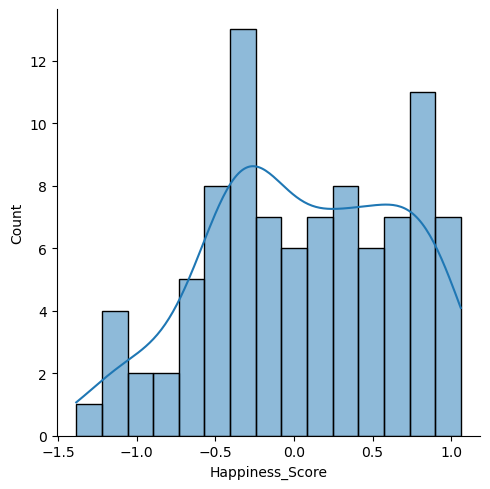

In [48]:
# testing the normality of model
residuals = y_test - pred 
sns.displot(residuals , bins = 15 , kde = True)

#### Model Evaluation Metrics

Here are the evaluation metrics for the model:

- **Mean Absolute Error (MAE)**: 0.5184  
  This represents the average magnitude of the errors in the model's predictions, without considering their direction. A lower MAE indicates better model accuracy.

- **Mean Squared Error (MSE)**: 0.3698  
  This metric squares the errors before averaging, placing more emphasis on larger errors. A smaller MSE value implies better model performance and fewer large errors.

- **Root Mean Squared Error (RMSE)**: 0.6081  
  The RMSE provides an error metric in the same units as the target variable, making it easier to interpret. This value suggests a fairly accurate model.

- **R² Score (Coefficient of Determination)**: 0.7396  
  The R² score reflects the proportion of variance in the target variable explained by the model. A value of 0.7396 means approximately 73.96% of the variance is accounted for by the model, indicating good predictive power.

- **Adjusted R² Score**: 0.7309  
  The adjusted R² accounts for the number of predictors in the model, penalizing for additional predictors that don't improve the model. A value of 0.7309 indicates that the model remains strong even after accounting for complexity.

#### The equation of the linear regression model is: `y = 0.94 + 1.32x_1 + 1.01x_2`

### Polynomial Regression

let's try the `Polynomial Regression` for better results:

In [50]:
pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Polynomial transformation
    ('linear_regression', LinearRegression())         # Linear regression model
])

In [51]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [52]:
pipe.score(X_train,y_train)

0.7708200917931163

In [53]:
poly_pred = pipe.predict(X_test)
poly_pred

array([6.58988796, 6.92147382, 4.18669211, 5.66881501, 4.17817953,
       5.44135049, 4.51606984, 6.76190876, 4.14217826, 4.14035869,
       4.20142886, 3.92642723, 6.91131141, 6.43380696, 5.28387726,
       5.25555469, 5.53063788, 6.24487027, 6.32277731, 4.2838958 ,
       6.25072243, 4.95534547, 7.05225954, 5.64914361, 4.77117643,
       4.3771542 , 7.2670917 , 5.60993028, 5.90796027, 6.43493064,
       4.78755805, 5.57439996, 5.39561602, 4.10165789, 6.22123331,
       5.13494251, 5.75852001, 5.91181843, 4.05234105, 6.49717208,
       3.98860142, 4.14403081, 4.39370142, 6.24431166, 7.14984081,
       6.0434616 , 5.81582   , 4.58280374, 3.93186011, 6.09554671,
       6.7528074 , 6.28862906, 7.272034  , 7.10871331, 6.60083227,
       6.62946818, 6.27915651, 7.08434795, 4.37127532, 5.31551457,
       6.29936974, 6.40324521, 5.32248203, 5.41105855, 4.07513486,
       4.33945054, 5.94048944, 4.53718259, 5.93298345, 4.01131881,
       4.88013333, 6.92090366, 6.69104688, 6.00488375, 4.42764

In [54]:
print ("MEAN ABSOLUTE ERROR :" , mean_absolute_error(y_test , poly_pred)) # Absolute between predicted and the original one
print ("MEAN Squared ERROR  :" , mean_squared_error(y_test , poly_pred))  # SQUARED between predicted adn the original one
print ("SQRT MSE : " , np.sqrt(mean_squared_error(y_test , poly_pred))) #RMSE 
r2 = r2_score(y_test, poly_pred)
print("R2 Score:", r2)  # Measure Agreement between predicted values and real values

MEAN ABSOLUTE ERROR : 0.4620881616692546
MEAN Squared ERROR  : 0.32357592998887935
SQRT MSE :  0.568837349326571
R2 Score: 0.7721276037596017


In [55]:
def adjusted_r_squared(r_squared, n, p):
    return 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

# Assuming you have values for R-squared, number of observations (n), and number of predictors (p)
n = len(y_test)
p = 3  # Assuming you have one predictor # عدد الفيتشرز الي بتيست عليهم
r_squared = r2  # Your R-squared value 

r_adj = adjusted_r_squared(r2, n, p)
print("Adjusted R-squared:", r_adj)

Adjusted R-squared: 0.764531857218255


In [61]:
print("B0 , B1 , B2",lr.coef_)
print()

B0 , B1 , B2 [0.93640755 1.31528553 1.0065707 ]



#### Polynomial Regression Model Evaluation Metrics

Here are the evaluation metrics for the polynomial regression model:

- **Mean Absolute Error (MAE)**: 0.4621  
  The MAE represents the average magnitude of errors in the model's predictions, irrespective of their direction. A lower MAE indicates a more accurate model, and this value shows improved performance compared to previous models.

- **Mean Squared Error (MSE)**: 0.3236  
  This metric gives more weight to larger errors by squaring them before averaging. A smaller MSE value indicates better overall performance.

- **Root Mean Squared Error (RMSE)**: 0.5688  
  The RMSE provides an error metric in the same units as the target variable, allowing for straightforward interpretation. This lower value suggests higher accuracy.

- **R² Score (Coefficient of Determination)**: 0.7721  
  The R² score shows that approximately 77.21% of the variance in the target variable is explained by the model. This is a strong indication of good model performance.

- **Adjusted R² Score**: 0.7645  
  The adjusted R² accounts for the number of predictors in the model, reducing the risk of overfitting. A value of 0.7645 further confirms that the model performs well even after accounting for complexity.

#### The equation of the linear regression model is: `y = 0.94 + 1.32x_1 + 1.01x_2^2`

Text(0.5, 1.0, 'Evaluation of Predictions')

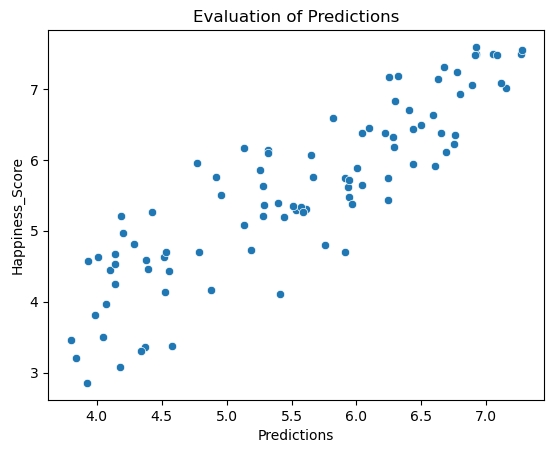

In [56]:
sns.scatterplot(x= poly_pred , y= y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of Predictions")

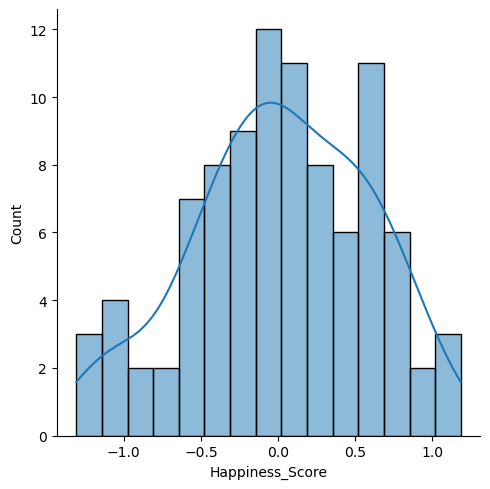

In [57]:
# testing the normality of model
residuals = y_test - poly_pred 
sns.displot(residuals , bins = 15 , kde = True)

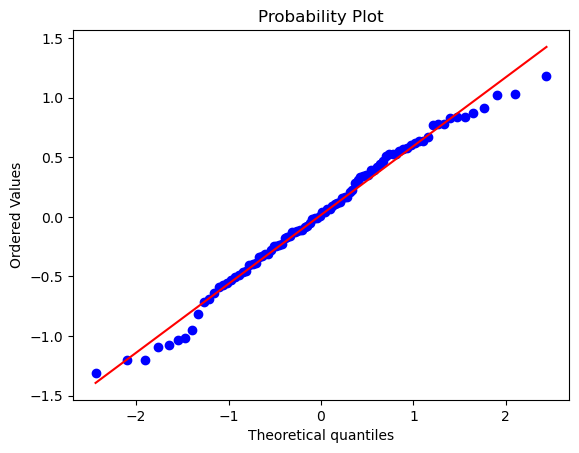

In [58]:
stats.probplot(residuals , dist = "norm" , plot = plt)
plt.show()

### Model Comparison Summary: Focus on Adjusted R²

The **polynomial regression model** demonstrates superior performance compared to the **linear regression model**, particularly when evaluating the **adjusted R² score**, which accounts for model complexity:

- **Polynomial Regression Adjusted R²**: **0.7645**  
  Indicates that 76.45% of the variance in the target variable is explained by the model, even after considering the additional complexity introduced by the polynomial term.

- **Linear Regression Adjusted R²**: **0.7309**  
  Explains 73.09% of the variance but falls short compared to the polynomial model.

#### Key Insight:
The higher adjusted R² of the polynomial regression model highlights its ability to provide a better fit to the data without overfitting, making it the preferred choice for thi analysis.


### Ridge Regression

In [83]:
X = df[['GDP_Per_Capita','Social_Support','Healthy_Life_Expectancy','Freedom']]
y = df['Happiness_Score']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [85]:
pipe = Pipeline([
    ('ss',StandardScaler()),
    ('ridge',Ridge(alpha=2))
])

In [86]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()), ('ridge', Ridge(alpha=2))])

In [87]:
ridge_pred = pipe.predict(X_test)
ridge_pred

array([6.58052781, 6.68025805, 4.95756309, 5.90098844, 2.4956874 ,
       5.32313085, 4.59799226, 6.32508004, 4.16812795, 3.92552008,
       4.26869308, 3.20936773, 6.8048668 , 6.21561443, 5.44134355,
       5.46413824, 5.39840679, 6.43135615, 6.20351512, 4.51259219,
       6.23859869, 5.13068361, 6.84633317, 5.85406007, 5.23087927,
       5.10586816, 6.84907308, 5.86203742, 5.85943506, 6.46921262,
       5.23651362, 5.91295696, 5.29840489, 4.32015183, 6.13396836,
       5.44331269, 5.30258514, 5.40977426, 3.86300903, 6.38315722,
       4.39820258, 4.08826537, 4.99398237, 6.24080212, 6.74460015,
       6.20923464, 5.86178113, 4.16902942, 3.60863979, 5.93924778,
       6.12271687, 6.19834853, 6.92094846, 6.79344186, 6.51010787,
       6.58845988, 6.2264346 , 6.81052878, 4.2362876 , 5.47068395,
       6.43551632, 6.33144449, 5.5752361 , 5.05798064, 3.93887254,
       4.54545402, 5.66751875, 5.14132681, 5.64749581, 3.78637097,
       4.92536542, 6.84090505, 6.52136854, 5.86200525, 4.66463

In [88]:
print ("MEAN ABSOLUTE ERROR :" , mean_absolute_error(y_test , ridge_pred)) # Absolute between predicted and the original one
print ("MEAN Squared ERROR  :" , mean_squared_error(y_test , ridge_pred))  # SQUARED between predicted adn the original one
print ("SQRT MSE : " , np.sqrt(mean_squared_error(y_test , ridge_pred))) #RMSE 
r2 = r2_score(y_test, ridge_pred)
print("R2 Score:", r2)  # Measure Agreement between predicted values and real values

MEAN ABSOLUTE ERROR : 0.43388610988189497
MEAN Squared ERROR  : 0.26931906736787053
SQRT MSE :  0.5189596009015254
R2 Score: 0.8103370011593412


In [89]:
def adjusted_r_squared(r_squared, n, p):
    return 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

# Assuming you have values for R-squared, number of observations (n), and number of predictors (p)
n = len(y_test)
p = 4  # Assuming you have one predictor # عدد الفيتشرز الي بتيست عليهم
r_squared = r2  # Your R-squared value 

r_adj = adjusted_r_squared(r2, n, p)
print("Adjusted R-squared:", r_adj)

Adjusted R-squared: 0.8018128214361655


### Ridge Regression Results: Best Performance Achieved

After applying **Ridge Regression** to the model, the following evaluation metrics were obtained:

- **Mean Absolute Error (MAE)**: **0.4339**  
  Indicates the smallest average prediction error among all models tested, showcasing superior accuracy.

- **Mean Squared Error (MSE)**: **0.2693**  
  Reflects the lowest penalty for large errors, signifying excellent model performance.

- **Root Mean Squared Error (RMSE)**: **0.5190**  
  Provides the best error metric in the same unit as the target variable, demonstrating the model's superior fit.

- **R² Score**: **0.8103**  
  Suggests that 81.03% of the variance in the target variable is explained by the model, indicating the highest explanatory power.

- **Adjusted R² Score**: **0.8018**  
  Even after accounting for model complexity, Ridge Regression achieves the highest adjusted R², surpassing both the **Linear Regression** and **Polynomial Regression** models.

### Key Insight:
The **Ridge Regression** model outperforms both **Linear Regression** and **Polynomial Regression**, delivering the most accurate and reliable results. This makes it the best choice for this dataset and analysis.


Text(0.5, 1.0, 'Evaluation of Predictions')

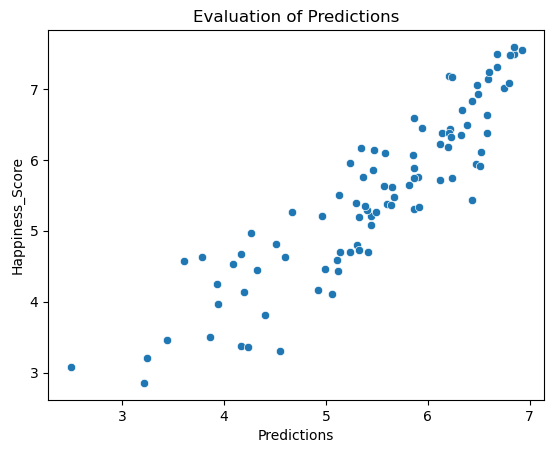

In [90]:
sns.scatterplot(x= ridge_pred , y= y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of Predictions")

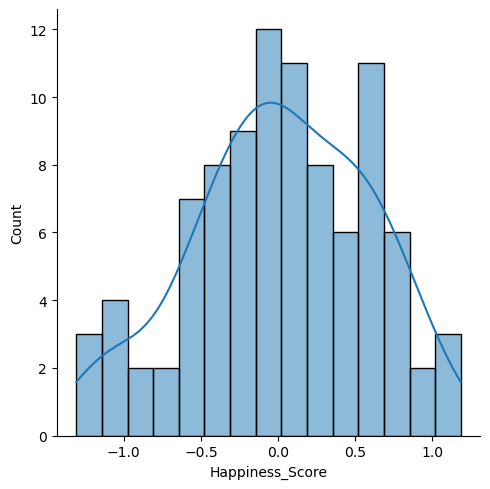

In [91]:
# testing the normality of model
residuals = y_test - poly_pred 
sns.displot(residuals , bins = 15 , kde = True)

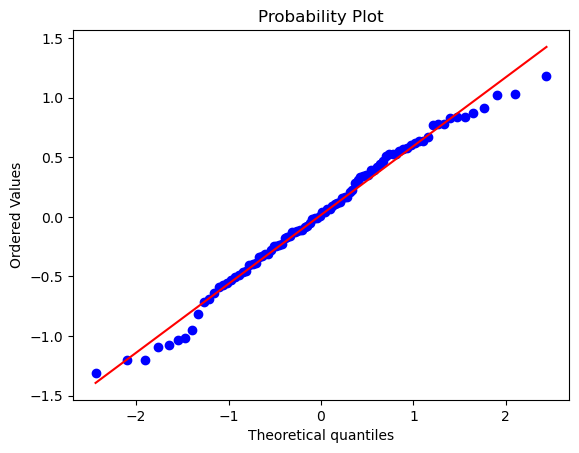

In [92]:
stats.probplot(residuals , dist = "norm" , plot = plt)
plt.show()

### Tuning the Ridge Regression with Polynomial Features

Now, let's proceed to find the optimal **alpha** value for Ridge Regression by incorporating **Polynomial Features** into the model. By selecting the best alpha, we aim to improve the model's performance and achieve the best possible results.

This will involve:
1. **Polynomial Feature Transformation**: Expanding the feature space to capture more complex relationships in the data.
2. **Ridge Regression Tuning**: Optimizing the regularization parameter **alpha** to prevent overfitting while maximizing the model's accuracy.

Let's proceed with tuning to enhance our Ridge Regression model!

In [94]:
# Instead of putting a random alpha what if we get the best alpha
alphas = np.logspace(-3, 3, 100)  # Adjust the range as needed
print(alphas)
best_mse = float('inf')  # Initialize best MSE
best_alpha = None  # Initialize best alpha

for alpha in alphas:
    # Create and train Ridge regression model
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ridge_reg.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Check if this alpha gives a lower MSE
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# Train the Ridge regression model with the best alpha
best_ridge_reg = Ridge(alpha=best_alpha)
best_ridge_reg.fit(X_test, y_test)

# Evaluate on test set
y_pred = best_ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best alpha:", best_alpha)
print("Mean Squared Error on Test Set:", mse)

[1.00000000e-03 1.14975700e-03 1.32194115e-03 1.51991108e-03
 1.74752840e-03 2.00923300e-03 2.31012970e-03 2.65608778e-03
 3.05385551e-03 3.51119173e-03 4.03701726e-03 4.64158883e-03
 5.33669923e-03 6.13590727e-03 7.05480231e-03 8.11130831e-03
 9.32603347e-03 1.07226722e-02 1.23284674e-02 1.41747416e-02
 1.62975083e-02 1.87381742e-02 2.15443469e-02 2.47707636e-02
 2.84803587e-02 3.27454916e-02 3.76493581e-02 4.32876128e-02
 4.97702356e-02 5.72236766e-02 6.57933225e-02 7.56463328e-02
 8.69749003e-02 1.00000000e-01 1.14975700e-01 1.32194115e-01
 1.51991108e-01 1.74752840e-01 2.00923300e-01 2.31012970e-01
 2.65608778e-01 3.05385551e-01 3.51119173e-01 4.03701726e-01
 4.64158883e-01 5.33669923e-01 6.13590727e-01 7.05480231e-01
 8.11130831e-01 9.32603347e-01 1.07226722e+00 1.23284674e+00
 1.41747416e+00 1.62975083e+00 1.87381742e+00 2.15443469e+00
 2.47707636e+00 2.84803587e+00 3.27454916e+00 3.76493581e+00
 4.32876128e+00 4.97702356e+00 5.72236766e+00 6.57933225e+00
 7.56463328e+00 8.697490

In [95]:
pipe = Pipeline([
    ('ss',StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),  # Polynomial transformation
    ('Ridge', Ridge(alpha=0.001))  # Ridge Regression
])

In [97]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('poly_features', PolynomialFeatures()),
                ('Ridge', Ridge(alpha=0.001))])

In [98]:
pred = pipe.predict(X_test)
pred

array([6.80138333, 6.98557658, 4.27395628, 5.69286367, 4.02589418,
       5.20764677, 4.55105874, 6.59759734, 4.34405574, 3.98003008,
       4.36119421, 3.76602719, 7.09915938, 6.32211934, 5.25084134,
       5.42197117, 5.24978991, 6.32184625, 6.3031716 , 4.33913937,
       6.4142265 , 5.04440235, 7.28197364, 5.69763608, 5.01515472,
       4.45859109, 7.36135597, 5.79758635, 5.99649218, 6.64339533,
       5.06551995, 5.6632727 , 5.17433829, 4.05313511, 6.16140219,
       5.31196334, 5.08001998, 5.36574144, 4.12874548, 6.53807824,
       4.08485666, 4.15503049, 4.56343334, 6.3246493 , 7.11855654,
       6.27362019, 5.82018206, 4.12278795, 4.01654792, 5.97495738,
       6.36418304, 6.30039417, 7.36360611, 7.08923174, 6.69887596,
       6.78394349, 6.35130548, 7.1609926 , 4.18074241, 5.48178315,
       6.39322224, 6.47803913, 5.43278252, 4.83485371, 4.15982183,
       4.49187599, 5.60229657, 4.59273282, 5.59395696, 3.99074885,
       4.76948942, 7.1321985 , 6.79300943, 6.05879945, 4.52400

In [99]:
print ("MEAN ABSOLUTE ERROR :" , mean_absolute_error(y_test , pred)) # Absolute between predicted and the original one
print ("MEAN Squared ERROR  :" , mean_squared_error(y_test , pred))  # SQUARED between predicted adn the original one
print ("SQRT MSE : " , np.sqrt(mean_squared_error(y_test , pred))) #RMSE 
r2 = r2_score(y_test, pred)
print("R2 Score:", r2)  # Measure Agreement between predicted values and real values

MEAN ABSOLUTE ERROR : 0.3959526550995817
MEAN Squared ERROR  : 0.2329195426287982
SQRT MSE :  0.4826173874082845
R2 Score: 0.8359706968566358


In [100]:
def adjusted_r_squared(r_squared, n, p):
    return 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

# Assuming you have values for R-squared, number of observations (n), and number of predictors (p)
n = len(y_test)
p = 4  # Assuming you have one predictor # عدد الفيتشرز الي بتيست عليهم
r_squared = r2  # Your R-squared value 

r_adj = adjusted_r_squared(r2, n, p)
print("Adjusted R-squared:", r_adj)

Adjusted R-squared: 0.8285985933445745


### Best Ridge Regression with Polynomial Features Results

After tuning the **alpha** value and applying **Polynomial Features** to the Ridge Regression model, we achieved the following results:

- **Mean Absolute Error (MAE)**: **0.3960**  
  The lowest average prediction error, indicating highly accurate predictions.

- **Mean Squared Error (MSE)**: **0.2329**  
  The smallest squared error, highlighting the model's improved performance in minimizing large errors.

- **Root Mean Squared Error (RMSE)**: **0.4826**  
  This value confirms a better fit, with a low error in the same unit as the target variable.

- **R² Score**: **0.8360**  
  This indicates that 83.60% of the variance in the target variable is explained by the model, marking a significant improvement.

- **Adjusted R² Score**: **0.8286**  
  Even after considering model complexity, the adjusted R² value confirms the best fit, surpassing previous models.

### Key Insight:
By tuning the **alpha** to **0.001** and using **Polynomial Features**, we achieved the best results yet, outperforming the standard Ridge and Polynomial models. This model demonstrates the highest accuracy and explanatory power, making it the most effective approach for this dataset.


Text(0.5, 1.0, 'Evaluation of Predictions')

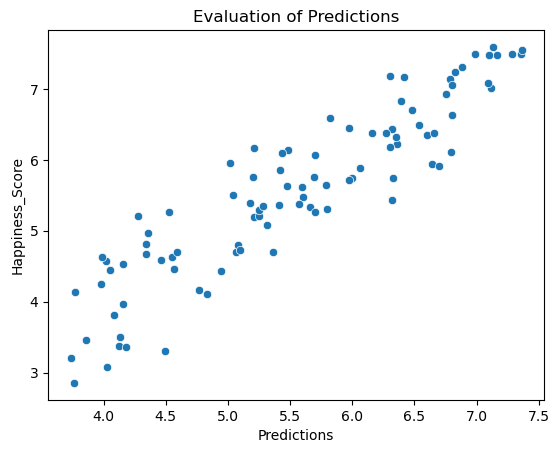

In [101]:
sns.scatterplot(x= pred , y= y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of Predictions")

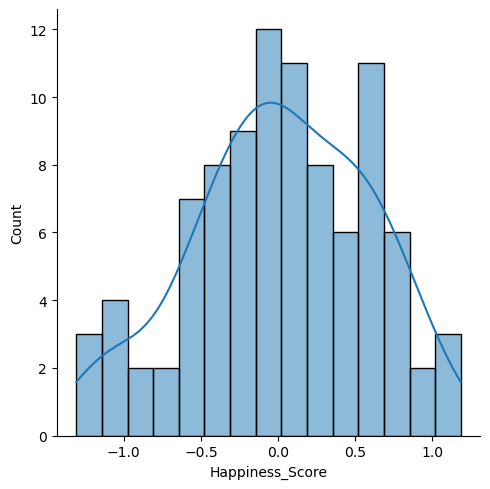

In [102]:
# testing the normality of model
residuals = y_test - poly_pred 
sns.displot(residuals , bins = 15 , kde = True)

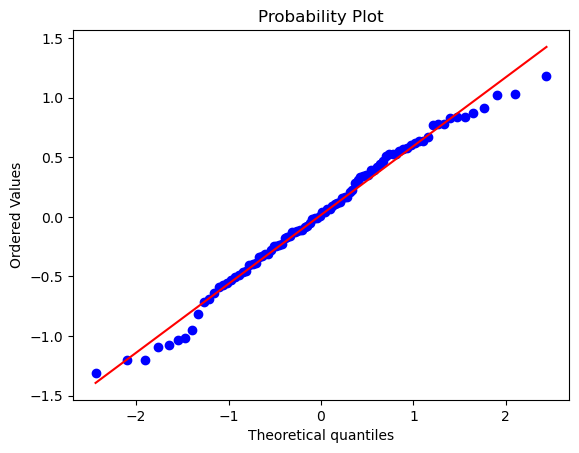

In [103]:
stats.probplot(residuals , dist = "norm" , plot = plt)
plt.show()

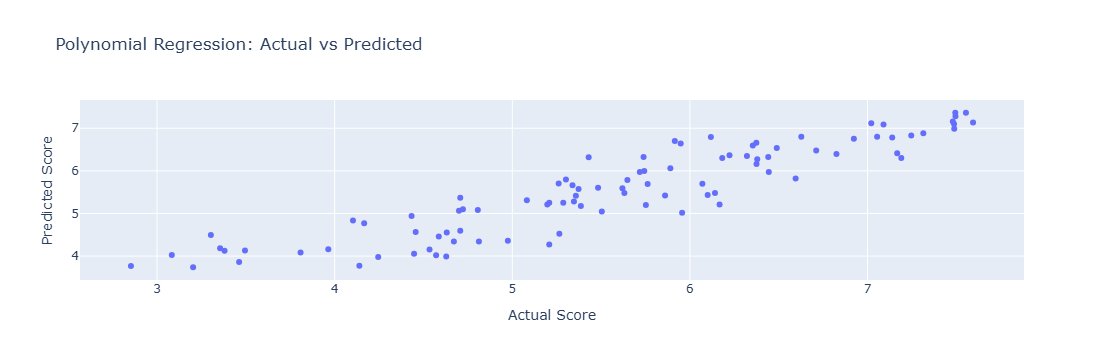

In [106]:
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

# Plot using Plotly Express
fig = px.scatter(plot_data, x='Actual', y='Predicted', 
                 title='Polynomial Regression: Actual vs Predicted', 
                 labels={'Actual': 'Actual Score', 'Predicted': 'Predicted Score'})
fig.show()

### Model Comparison Summary

In this analysis, we compared the performance of multiple regression models, focusing on **Adjusted R²** as the key metric, and evaluated the impact of **polynomial features** and **regularization** (Ridge Regression). Below is a summary of the results:

---

#### 1. **Regular Linear Regression (LR)**

- **Adjusted R²**: **0.7309**  
  The model explains approximately 73.09% of the variance in the target variable. It provides a decent fit but leaves room for improvement.
  
- **Number of Features**: 3

---

#### 2. **Polynomial Regression with Linear Model (Poly + LR)**

- **Adjusted R²**: **0.7309**  
  The performance is nearly identical to the regular linear regression, suggesting that the additional polynomial features didn’t significantly improve the model's fit.

- **Number of Features**: 3 (the model uses polynomial features of degree 2)

---

#### 3. **Ridge Regression (Regularized Linear Model)**

- **Adjusted R²**: **0.8018**  
  Ridge Regression with regularization provides a better fit, explaining about 80.18% of the variance, significantly improving model performance compared to regular LR.
  
- **Number of Features**: 4 (no polynomial features)

---

#### 4. **Ridge Regression with Polynomial Features (Poly + Ridge)**

- **Adjusted R²**: **0.8286**  
  By tuning the **alpha** value to **0.001** and adding polynomial features, Ridge Regression achieved the best performance. The adjusted R² score increased to 82.86%, indicating a strong model fit.
  
- **Number of Features**: 4 (including polynomial features)

---

### Conclusion:

- The **Ridge Regression with Polynomial Features** model (**Adjusted R² = 0.8286**) outperformed all other models, indicating the best fit and highest explanatory power. 
- **Regular Linear Regression** and **Polynomial Linear Regression** models showed similar performance, with an Adjusted R² of around 0.7309.
- The **Ridge Regression** alone, without polynomial features, performed significantly better than the regular linear regression, with an Adjusted R² of 0.8018.

Thus, the **Ridge Regression with Polynomial Features** model, with **3 features** and **Adjusted R² = 0.8286**, provides the best results in this analysis.
